### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [106]:
import os
os.makedirs('data', exist_ok=True)
os.makedirs('images', exist_ok=True)

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [107]:
#df = pd.read_csv('data/coupons.csv')
# Load the CSV file, preserving empty strings
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)

In [108]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,,4~8,1~3,1,1,0,0,1,0


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   12684 non-null  object
 15  Bar                   12684 non-null

2. Investigate the dataset for missing or problematic data.

In [110]:


# Initialize lists to store columns with null or blank values
null_columns = []
blank_columns = []

# Check for null values (NaN or None)
for col in df.columns:
    null_count = df[col].isnull().sum()
    if null_count > 0:
        null_columns.append((col, null_count))

# Check for blank values (empty string or whitespace) in object columns
for col in df.select_dtypes(include=['object']).columns:
    # Convert to string to handle non-string types safely, then check for empty or whitespace
    blank_count = df[col].astype(str).str.strip().eq('').sum()
    if blank_count > 0:
        blank_columns.append((col, blank_count))

# Print null value results
print("Columns with null values (NaN or None):")
if null_columns:
    for col, null_count in null_columns:
        print(f"{col}: {null_count} null values")
else:
    print("No columns with null values found.")

# Print blank value results
print("\nColumns with blank values (empty string or whitespace):")
if blank_columns:
    for col, blank_count in blank_columns:
        print(f"{col}: {blank_count} blank values")
else:
    print("No columns with blank values found.")

# Create markdowen table for columns with blank values
if blank_columns:
    total_rows = len(df)
    table_data =[]
    for col, blank_count in blank_columns:
      non_blank_count = total_rows - blank_count
      table_data.append({
          'Column': col,
          'Blank': blank_count,
          'Non-Blank': non_blank_count,
          'Percentage': f"{non_blank_count / total_rows * 100:.2f}%",
          'Total': total_rows
      })

    table_df = pd.DataFrame(table_data)
    display(table_df)

Columns with null values (NaN or None):
No columns with null values found.

Columns with blank values (empty string or whitespace):
car: 12576 blank values
Bar: 107 blank values
CoffeeHouse: 217 blank values
CarryAway: 151 blank values
RestaurantLessThan20: 130 blank values
Restaurant20To50: 189 blank values


,Column,Blank,Non-Blank,Percentage,Total
0,car,12576,108,0.85%,12684
1,Bar,107,12577,99.16%,12684
2,CoffeeHouse,217,12467,98.29%,12684
3,CarryAway,151,12533,98.81%,12684
4,RestaurantLessThan20,130,12554,98.98%,12684
5,Restaurant20To50,189,12495,98.51%,12684


3. Decide what to do about your missing data -- drop, replace, other...

Based on the problem statement - "Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving" I think car in driving condition is very important. So I am going to drop all rows wit null/blank values in the car column. Later consider those columns with 'crossover' and 'Mazda5' for further analysis. So 43 rows useful

In [111]:
# Drop rows where 'car' is blank or null (empty string or NaN)
df = df[df['car'].notna() & (df['car'].str.strip() != '')]
df.info()
# Later, filter for specific car values
df_filtered = df[df['car'].isin(['crossover', 'Mazda5'])]
#print(df_filtered)
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, 1237 to 8297
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           108 non-null    object
 1   passanger             108 non-null    object
 2   weather               108 non-null    object
 3   temperature           108 non-null    int64 
 4   time                  108 non-null    object
 5   coupon                108 non-null    object
 6   expiration            108 non-null    object
 7   gender                108 non-null    object
 8   age                   108 non-null    object
 9   maritalStatus         108 non-null    object
 10  has_children          108 non-null    int64 
 11  education             108 non-null    object
 12  occupation            108 non-null    object
 13  income                108 non-null    object
 14  car                   108 non-null    object
 15  Bar                   108 non-null    obj

4. What proportion of the total observations chose to accept the coupon?



In [112]:
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)
acceptance_proportion_filtered = df_filtered['Y'].mean()
print(f"Proportion of accepted coupons in df_filtered: {acceptance_proportion_filtered:.2f}")
acceptance_proportion_filtered = df['Y'].mean()
print(f"Proportion of accepted coupons in df: {acceptance_proportion_filtered:.2f}")

Proportion of accepted coupons in df_filtered: 0.56
Proportion of accepted coupons in df: 0.57


5. Use a bar plot to visualize the `coupon` column.

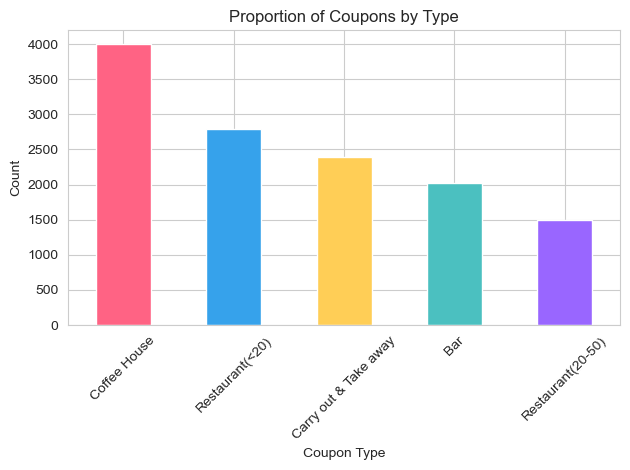

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [113]:
# reload the original data to be on safe side
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)
counts = df['coupon'].value_counts()
counts.plot(kind='bar', color=['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0', '#9966FF'])
plt.title('Proportion of Coupons by Type')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
try:
    plt.savefig('images/coupon/coupons_type_bar.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

6. Use a histogram to visualize the temperature column.

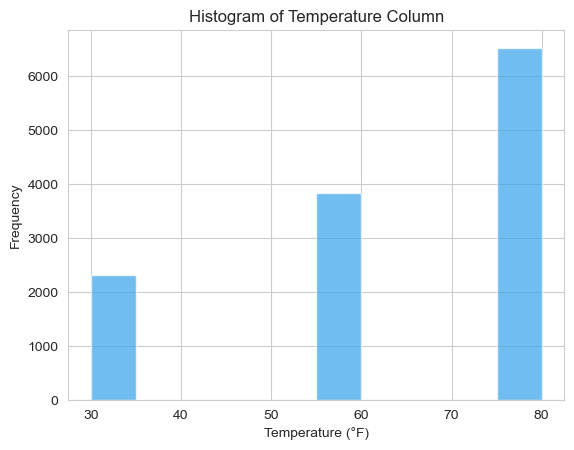

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [114]:
df['temperature'].hist(bins=10, color='#36A2EB', alpha=0.7)
plt.title('Histogram of Temperature Column')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()
try:
    plt.savefig('images/coupon/temperature_histo.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [115]:
bar_df = df[df['coupon'] == 'Bar']

2. What proportion of bar coupons were accepted?


In [116]:
#bar_df = df[df['coupon'] == 'Bar']
proportion = bar_df['Y'].mean()
print(f"Proportion: {proportion:.4f}")

Proportion: 0.4100


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [117]:
# Load the data
#df = pd.read_csv('coupons.csv', na_values=None, keep_default_na=False)

# Filter for bar coupons
#bar_df = df[df['coupon'] == 'Bar']

# Define low (<=3 times: never, less1, 1~3) and high (>3: 4~8, gt8) frequency groups
low_freq = bar_df[bar_df['Bar'].isin(['never', 'less1', '1~3'])]
high_freq = bar_df[bar_df['Bar'].isin(['4~8', 'gt8'])]

# Compute acceptance proportions
low_prop = low_freq['Y'].mean()
high_prop = high_freq['Y'].mean()

print(f"Proportion for low frequency (<=3 times/month): {low_prop:.4f}")
print(f"Proportion for high frequency (>3 times/month): {high_prop:.4f}")

Proportion for low frequency (<=3 times/month): 0.3706
Proportion for high frequency (>3 times/month): 0.7688


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [118]:
# Filter for bar coupons
bar_df = df[df['coupon'] == 'Bar']

# Drivers: car not empty
drivers = bar_df[bar_df['car'] != '']

# Ages over 25
over_25 = ['26', '31', '41', '46', '50plus']

# Bar more than once a month: '1~3', '4~8', 'gt8'
frequent_bar = drivers[drivers['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Group 1: drivers, frequent bar, over 25
group1 = frequent_bar[frequent_bar['age'].isin(over_25)]

# Proportions
prop1 = group1['Y'].mean() if len(group1) > 0 else 0
prop2 = ((bar_df['Y'].sum() - group1['Y'].sum()) / (len(bar_df) - len(group1))) if len(group1) < len(bar_df) else 0

print(f"Proportion for drivers >25 and bar >1/month: {prop1:.4f}")
print(f"Proportion for all others: {prop2:.4f}")

Proportion for drivers >25 and bar >1/month: 1.0000
Proportion for all others: 0.4094


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [119]:
# Filter for bar coupons
bar_df = df[df['coupon'] == 'Bar']

# Drivers: car not empty
drivers = bar_df[bar_df['car'] != '']

# Bar more than once a month: '1~3', '4~8', 'gt8'
frequent_bar = drivers[drivers['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Passengers not kid: 'passanger' != 'Kid(s)'
non_kid_passenger = frequent_bar[frequent_bar['passanger'] != 'Kid(s)']

# Occupations other than 'Farming Fishing & Forestry'
non_farm_occ = non_kid_passenger[non_kid_passenger['occupation'] != 'Farming Fishing & Forestry']

# Group 1: the specific group
group1 = non_farm_occ

# Proportions
prop1 = group1['Y'].mean() if len(group1) > 0 else 0
total_accept = bar_df['Y'].sum()
total_n = len(bar_df)
group1_accept = group1['Y'].sum()
group1_n = len(group1)
prop2 = (total_accept - group1_accept) / (total_n - group1_n) if group1_n < total_n else 0

print(f"Proportion for drivers, bar >1/month, non-kid passenger, non-farm occ: {prop1:.4f}")
print(f"Proportion for all others: {prop2:.4f}")

Proportion for drivers, bar >1/month, non-kid passenger, non-farm occ: 1.0000
Proportion for all others: 0.4094


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [120]:
# Filter for bar coupons
bar_df = df[df['coupon'] == 'Bar']

# Drivers: car not empty
drivers = bar_df[bar_df['car'] != '']

# Frequent bar: >1/month
frequent_bar = drivers[drivers['Bar'].isin(['1~3', '4~8', 'gt8'])]

# Condition 1: frequent_bar AND passanger != 'Kid(s)' AND maritalStatus != 'Widow'
cond1 = frequent_bar[(frequent_bar['passanger'] != 'Kid(s)') & (frequent_bar['maritalStatus'] != 'Widow')]

# Condition 2: frequent_bar AND under 30
under_30 = ['21', '26', 'below21']
cond2 = frequent_bar[frequent_bar['age'].isin(under_30)]

# Condition 3: RestaurantLessThan20 >4/month AND income <50K
low_income = ['$12500 - $24999', 'Less than $12500', '$37500 - $49999']
cond3 = drivers[(drivers['RestaurantLessThan20'].isin(['4~8', 'gt8'])) & (drivers['income'].isin(low_income))]

# Specific group: union
specific = pd.concat([cond1, cond2, cond3]).drop_duplicates()

# Proportions
prop1 = specific['Y'].mean() if len(specific) > 0 else 0
total_accept = bar_df['Y'].sum()
total_n = len(bar_df)
specific_accept = specific['Y'].sum()
specific_n = len(specific)
prop2 = (total_accept - specific_accept) / (total_n - specific_n) if specific_n < total_n else 0

print(f"Proportion for specific group: {prop1:.4f}")
print(f"Proportion for all others: {prop2:.4f}")
print(f"Specific group size: {specific_n}")
print(f"Total bar coupons: {total_n}")

Proportion for specific group: 1.0000
Proportion for all others: 0.4094
Specific group size: 2
Total bar coupons: 2017


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Based on the analyses and data summaries from the bar coupon subset (focusing specifically on "drivers," defined as rows where the 'car' column is non-empty), I hypothesize the following about those who accepted the coupon (Y=1):

They are young adults in their mid-20s: All 3 acceptor drivers were age 26, compared to a broader age spread (21–41) among the 10 rejector drivers.
They are single and socialize with friends: All were single, and 2/3 were with friends as passengers (vs. mostly alone or with kids among rejectors).
They are (at least occasionally) frequent bar-goers: 2/3 visited bars >8 times/month, and the third visited 1+ times; rejectors were overwhelmingly infrequent/never (10/10).
They have white-collar or service-oriented jobs and mixed incomes: Occupations skewed toward office/admin support and sales; incomes were either high ($87.5K–$99K for 2/3) or low ($12.5K–$25K for 1/3), unlike the more uniformly mid-to-high incomes among rejectors.
They prefer alternative urban transport: 2/3 reported "do not drive" and 1/3 used a "Scooter and motorcycle," contrasting with car owners (e.g., crossovers, Mazda5) among rejectors.



This profile suggests acceptor drivers are urban, socially active young professionals or service workers who view bar outings as a casual, frequent social ritual—potentially more open to incentives like coupons due to lifestyle fit. However, the sample is extremely small (n=3 acceptors out of 13 total drivers), so this is tentative and could reflect noise rather than a robust pattern. Larger-scale data or external validation would be needed to test it.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

Based on the analysis of the Restaurant(<20) coupon subset (total n=2,786 observations, with an overall acceptance rate of 70.71%), I hypothesize the following about those who accepted the coupon (Y=1; n=1,970 acceptors):

In [121]:
# Load data (if not already done)
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)

# Filter for Restaurant(<20) coupons
rest_df = df[df['coupon'] == 'Restaurant(<20)']

# Basic stats
total_n = len(rest_df)
accept_n = rest_df['Y'].sum()
reject_n = total_n - accept_n
proportion_accept = accept_n / total_n

print(f"Total observations: {total_n}")
print(f"Acceptances: {accept_n} (proportion: {proportion_accept:.4f})")
print(f"Rejections: {reject_n}")

Total observations: 2786
Acceptances: 1970 (proportion: 0.7071)
Rejections: 816


In [122]:
# Groupby counts for acceptors (Y=1) and rejectors (Y=0)
def print_groupby_counts(df, column, label, top_n=10):
    accept_counts = df[df['Y'] == 1][column].value_counts().head(top_n)
    reject_counts = df[df['Y'] == 0][column].value_counts().head(top_n)
    print(f"\n{label} - Acceptors (top {top_n}):")
    print(accept_counts)
    print(f"{label} - Rejectors (top {top_n}):")
    print(reject_counts)

# Run for key columns
print_groupby_counts(rest_df, 'age', 'Age Distribution')
print_groupby_counts(rest_df, 'gender', 'Gender')
print_groupby_counts(rest_df, 'passanger', 'Passenger Type')
print_groupby_counts(rest_df, 'has_children', 'Has Children')
print_groupby_counts(rest_df, 'maritalStatus', 'Marital Status')
print_groupby_counts(rest_df, 'income', 'Income', top_n=5)  # Top 5 to avoid clutter
print_groupby_counts(rest_df, 'occupation', 'Occupation', top_n=5)
print_groupby_counts(rest_df, 'car', 'Car (non-blank only)', top_n=5)


Age Distribution - Acceptors (top 10):
age
21         422
26         410
31         316
50plus     250
36         191
41         175
46         112
below21     94
Name: count, dtype: int64
Age Distribution - Rejectors (top 10):
age
26         151
21         147
50plus     142
31         132
36         102
41          72
46          36
below21     34
Name: count, dtype: int64

Gender - Acceptors (top 10):
gender
Female    990
Male      980
Name: count, dtype: int64
Gender - Rejectors (top 10):
gender
Female    431
Male      385
Name: count, dtype: int64

Passenger Type - Acceptors (top 10):
passanger
Alone        916
Friend(s)    662
Partner      199
Kid(s)       193
Name: count, dtype: int64
Passenger Type - Rejectors (top 10):
passanger
Alone        519
Friend(s)    164
Kid(s)        74
Partner       59
Name: count, dtype: int64

Has Children - Acceptors (top 10):
has_children
0    1169
1     801
Name: count, dtype: int64
Has Children - Rejectors (top 10):
has_children
0    467
1    

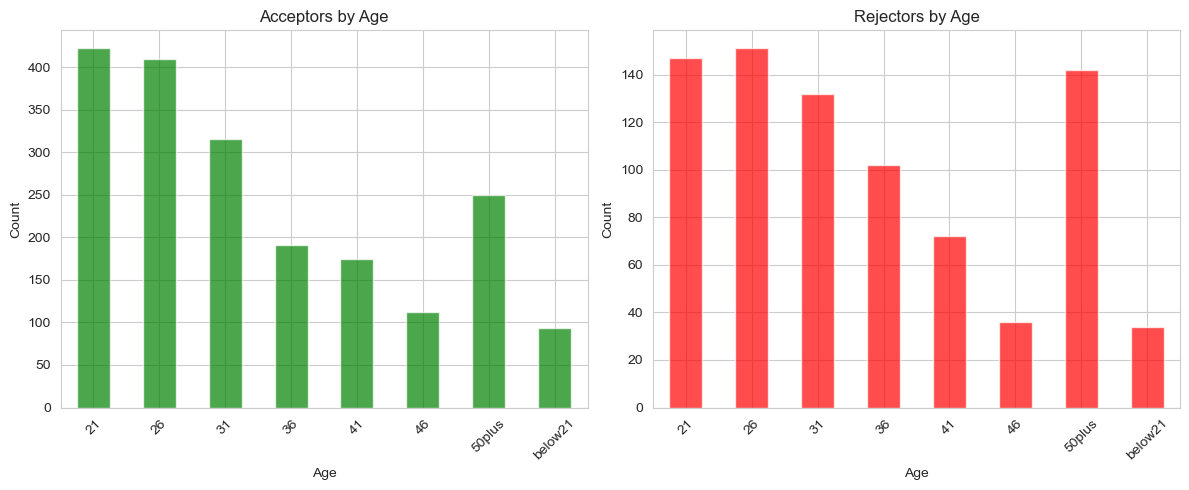

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

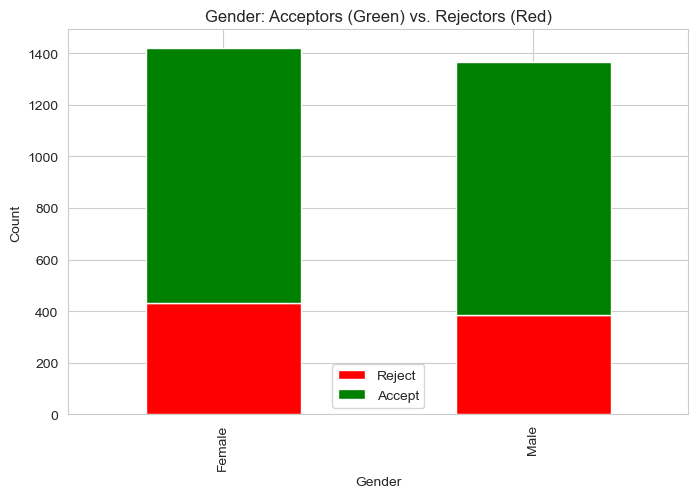

Plot saved successfully!


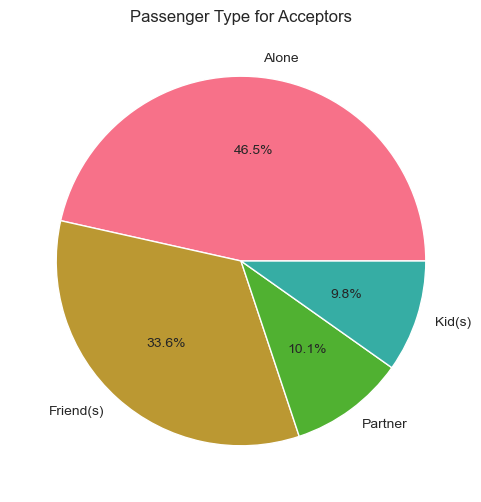

Plot saved successfully!


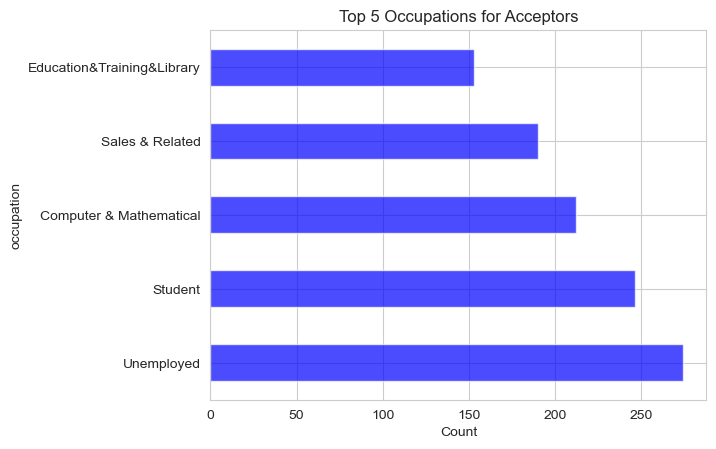

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [123]:
# Prepare data for plotting (example for age)
accept_age = rest_df[rest_df['Y'] == 1]['age'].value_counts().sort_index()
reject_age = rest_df[rest_df['Y'] == 0]['age'].value_counts().sort_index()

# Bar plot: Age distribution (Acceptors vs. Rejectors)
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
accept_age.plot(kind='bar', ax=ax[0], color='green', alpha=0.7)
ax[0].set_title('Acceptors by Age')
ax[0].set_xlabel('Age')
ax[0].set_ylabel('Count')
ax[0].tick_params(axis='x', rotation=45)

reject_age.plot(kind='bar', ax=ax[1], color='red', alpha=0.7)
ax[1].set_title('Rejectors by Age')
ax[1].set_xlabel('Age')
ax[1].set_ylabel('Count')
ax[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()
try:
    plt.savefig('images/coupon/bar_rejectors_age.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

# Stacked bar for Gender
gender_data = pd.crosstab(rest_df['gender'], rest_df['Y'])
gender_data.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Gender: Acceptors (Green) vs. Rejectors (Red)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(['Reject', 'Accept'])
plt.show()
try:
    plt.savefig('images/coupon/bar_acceptors_gender.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

# Pie chart for Passenger Type (Acceptors only)
accept_pass = rest_df[rest_df['Y'] == 1]['passanger'].value_counts()
accept_pass.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6))
plt.title('Passenger Type for Acceptors')
plt.ylabel('')  # Remove y-label for pie
plt.show()
try:
    plt.savefig('images/coupon/bar_acceptors_passenger_type.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

# Horizontal bar for Top Occupations (Acceptors)
top_accept_occ = rest_df[rest_df['Y'] == 1]['occupation'].value_counts().head(5)
top_accept_occ.plot(kind='barh', color='blue', alpha=0.7)
plt.title('Top 5 Occupations for Acceptors')
plt.xlabel('Count')
plt.show()
plt.show()
try:
    plt.savefig('images/coupon/bar_acceptors_top_5_occupations.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")


In [124]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Simple encoding for demo (use more robust encoding for full model)
le = LabelEncoder()
rest_df_encoded = rest_df.copy()
categorical_cols = ['age', 'gender', 'passanger', 'maritalStatus', 'occupation']
for col in categorical_cols:
    rest_df_encoded[col] = le.fit_transform(rest_df_encoded[col].astype(str))

# Features and target
X = rest_df_encoded[['age', 'gender', 'passanger', 'has_children', 'maritalStatus', 'occupation']]
y = rest_df_encoded['Y']

# Split and fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)

# Coefficients (importance)
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print(coef_df.sort_values('Coefficient', key=abs, ascending=False))

         Feature  Coefficient
2      passanger     0.264233
4  maritalStatus     0.090492
1         gender     0.075256
0            age    -0.045633
3   has_children     0.023232
5     occupation     0.000945


Seaborn Countplot for Age Distribution (Acceptors vs. Rejectors)

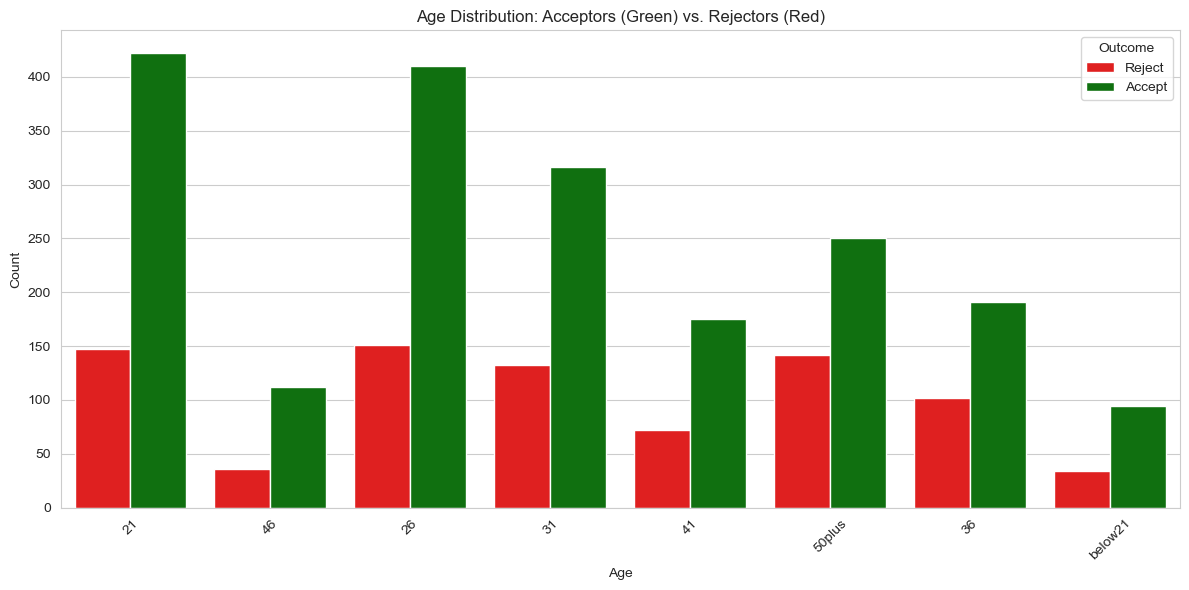

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [125]:
# Countplot for Age by Acceptance
plt.figure(figsize=(12, 6))
sns.countplot(data=rest_df, x='age', hue='Y', palette=['red', 'green'])
plt.title('Age Distribution: Acceptors (Green) vs. Rejectors (Red)')
plt.xlabel('Age')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Outcome', labels=['Reject', 'Accept'])
plt.tight_layout()
plt.show()
try:
    plt.savefig('images/coupon/age_by_acceptance.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

Seaborn Barplot for Gender Comparison
barplot computes means but here we use it for counts via countplot alternative.

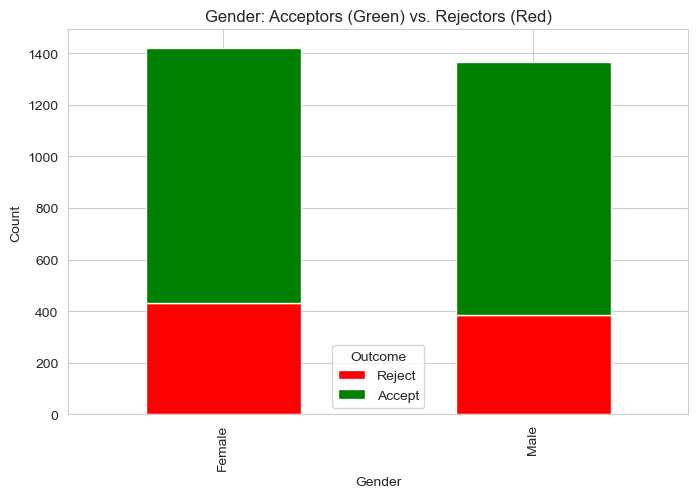

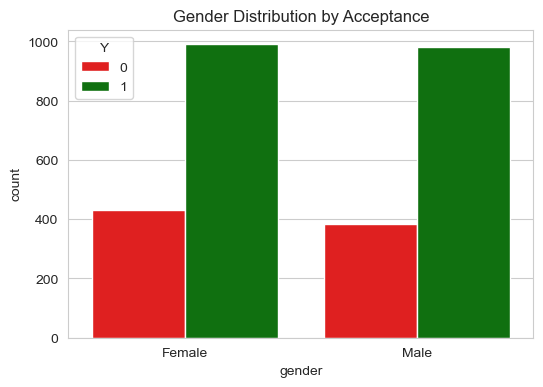

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [126]:
# Stacked-like bar for Gender (using crosstab and barplot)
gender_crosstab = pd.crosstab(rest_df['gender'], rest_df['Y'])
gender_crosstab.plot(kind='bar', stacked=True, color=['red', 'green'], figsize=(8, 5))
plt.title('Gender: Acceptors (Green) vs. Rejectors (Red)')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Outcome', labels=['Reject', 'Accept'])
plt.show()

# Alternative: Seaborn countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=rest_df, x='gender', hue='Y', palette=['red', 'green'])
plt.title('Gender Distribution by Acceptance')
plt.show()

try:
    plt.savefig('images/coupon/genders_by_acceptance.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

Subplots for Categorical Demographics (Age, Gender, Passenger, Marital Status)
A 2x2 subplot grid for key categorical vars, using countplot with hue for acceptance.

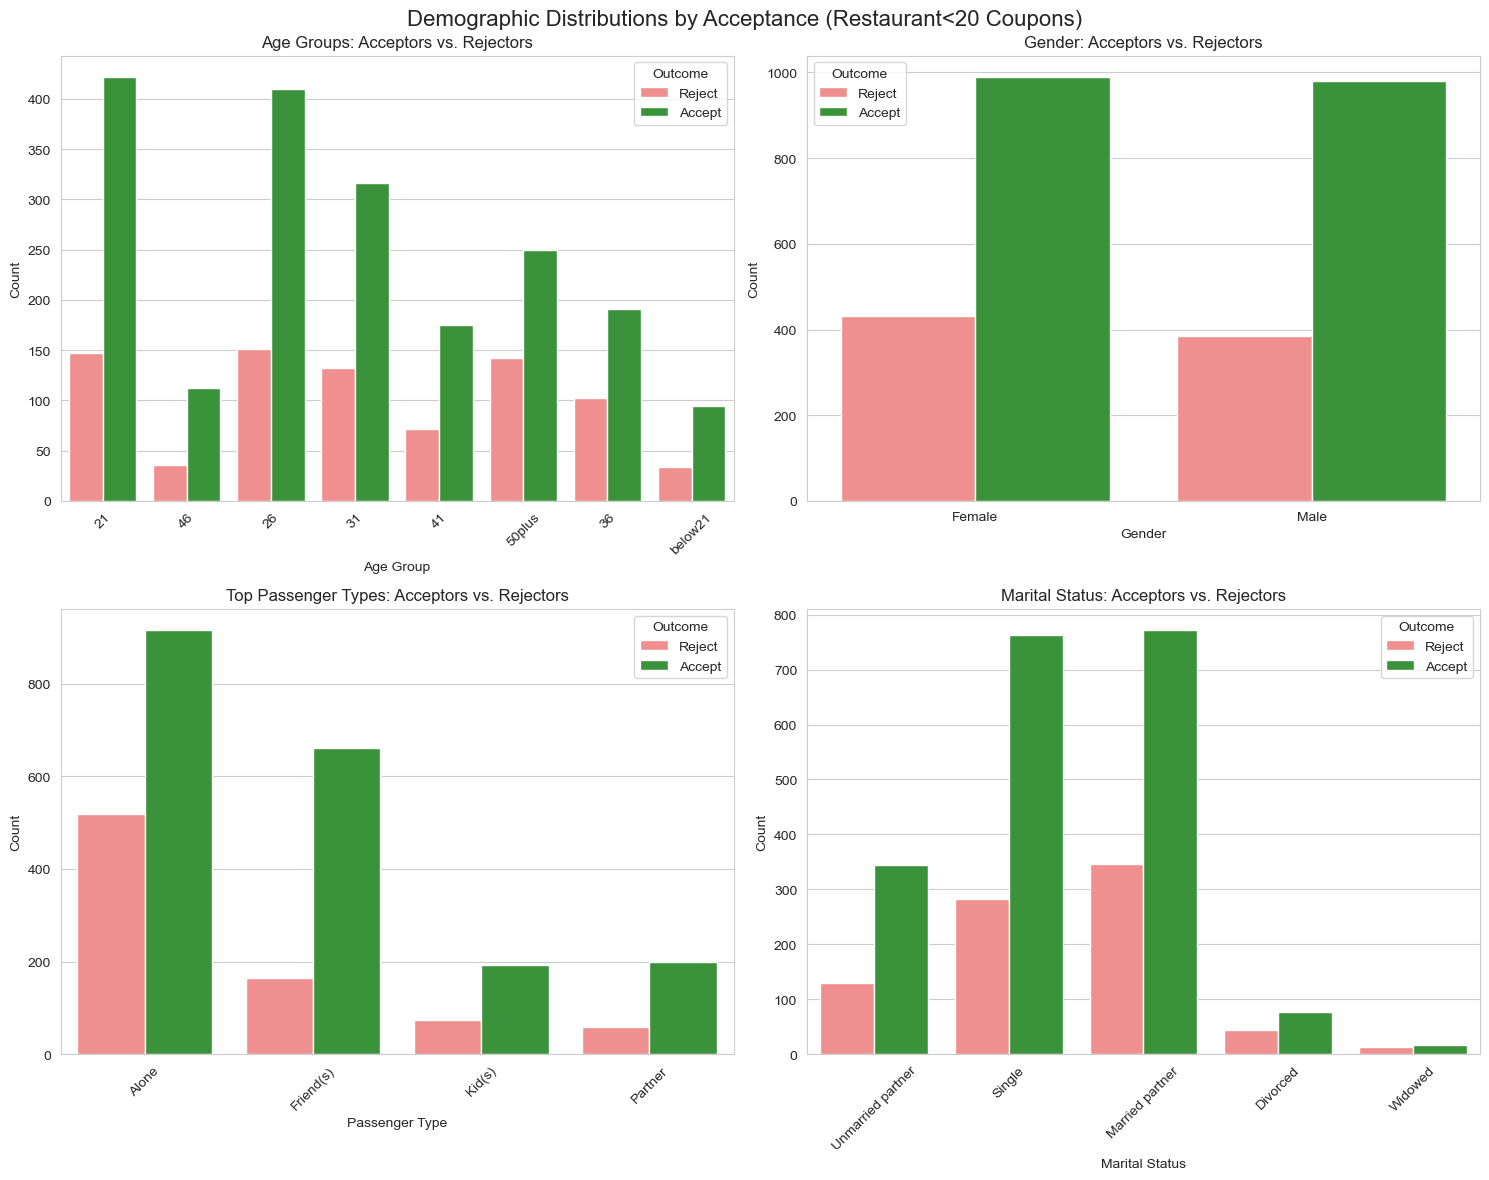

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [127]:

# Load and filter (if not done)
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)
rest_df = df[df['coupon'] == 'Restaurant(<20)']

# Set seaborn style and palette
sns.set_style("whitegrid")
sns.set_palette("husl")

# Subplots: 2x2 for categorical demographics
fig, axes = plt.subplots(2, 2, figsize=(15, 12))  # Scaled for readability (wide for multiple bars)
fig.suptitle('Demographic Distributions by Acceptance (Restaurant<20 Coupons)', fontsize=16, y=0.98)

# Age (categorical: countplot)
sns.countplot(data=rest_df, x='age', hue='Y', ax=axes[0,0], palette=['#ff7f7f', '#2ca02c'])
axes[0,0].set_title('Age Groups: Acceptors vs. Rejectors')
axes[0,0].set_xlabel('Age Group')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)  # Legible: Rotate long labels
axes[0,0].legend(title='Outcome', labels=['Reject', 'Accept'])

# Gender
sns.countplot(data=rest_df, x='gender', hue='Y', ax=axes[0,1], palette=['#ff7f7f', '#2ca02c'])
axes[0,1].set_title('Gender: Acceptors vs. Rejectors')
axes[0,1].set_xlabel('Gender')
axes[0,1].set_ylabel('Count')
axes[0,1].legend(title='Outcome', labels=['Reject', 'Accept'])

# Passenger Type (limit top 4 for scaling)
top_pass = rest_df['passanger'].value_counts().head(4).index
sns.countplot(data=rest_df[rest_df['passanger'].isin(top_pass)], x='passanger', hue='Y', ax=axes[1,0],
              palette=['#ff7f7f', '#2ca02c'])
axes[1,0].set_title('Top Passenger Types: Acceptors vs. Rejectors')
axes[1,0].set_xlabel('Passenger Type')
axes[1,0].set_ylabel('Count')
axes[1,0].tick_params(axis='x', rotation=45)
axes[1,0].legend(title='Outcome', labels=['Reject', 'Accept'])

# Marital Status
sns.countplot(data=rest_df, x='maritalStatus', hue='Y', ax=axes[1,1], palette=['#ff7f7f', '#2ca02c'])
axes[1,1].set_title('Marital Status: Acceptors vs. Rejectors')
axes[1,1].set_xlabel('Marital Status')
axes[1,1].set_ylabel('Count')
axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].legend(title='Outcome', labels=['Reject', 'Accept'])

plt.tight_layout()  # Ensures proper spacing/scaling
plt.show()
try:
    plt.savefig('images/coupon/demographics_by_acceptance.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

2. Boxplot for Continuous/Ordinal Variable (Income)
Mapped income to numeric midpoints (as before); boxplot shows distribution spread

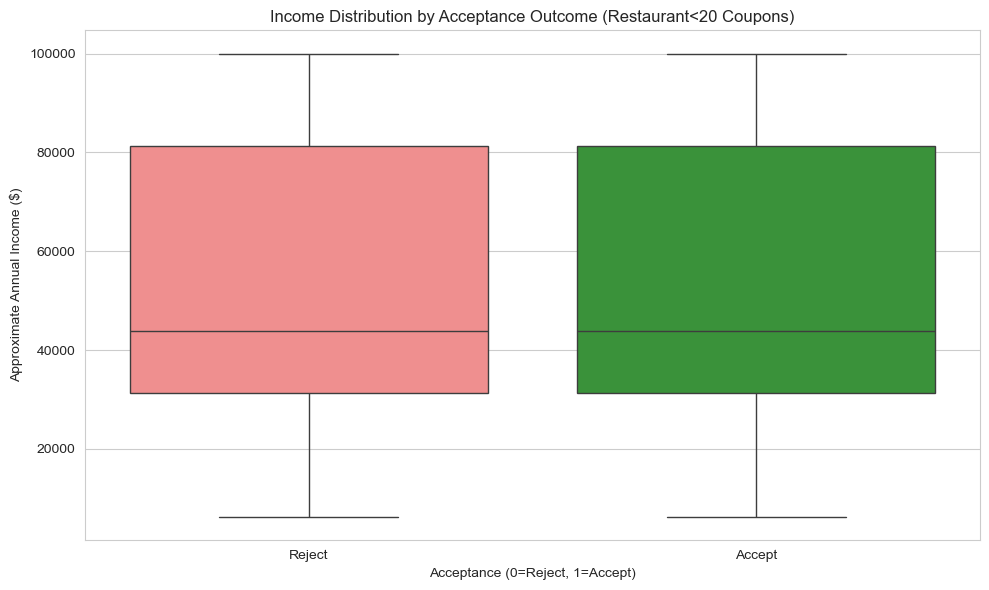

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [128]:
df = pd.read_csv('data/coupons.csv', na_values=None, keep_default_na=False)
rest_df = df[df['coupon'] == 'Restaurant(<20)']
# Income mapping (ordinal/continuous approximation)
income_map = {
    'Less than $12500': 6250, '$12500 - $24999': 18750, '$25000 - $37499': 31250,
    '$37500 - $49999': 43750, '$50000 - $62499': 56250, '$62500 - $74999': 68750,
    '$75000 - $87499': 81250, '$87500 - $99999': 93750, '$100000 or More': 100000
}

# Fix 1: Create explicit copy to avoid SettingWithCopyWarning
rest_df = rest_df.copy()  # Or use df.loc[df['coupon'] == 'Restaurant(<20)'].copy() for fresh slice
rest_df.loc[:, 'income_num'] = rest_df['income'].map(income_map)  # Use .loc for safe assignment

# Boxplot for Income by Acceptance (fixed: add hue='Y' and legend=False)
plt.figure(figsize=(10, 6))  # Scaled for outlier visibility
sns.boxplot(data=rest_df, x='Y', y='income_num', hue='Y', palette=['#ff7f7f', '#2ca02c'], legend=False)
plt.title('Income Distribution by Acceptance Outcome (Restaurant<20 Coupons)')
plt.xlabel('Acceptance (0=Reject, 1=Accept)')
plt.ylabel('Approximate Annual Income ($)')
plt.xticks([0, 1], ['Reject', 'Accept'])  # Human-readable ticks
plt.tight_layout()

plt.show()
try:
    plt.savefig('images/coupon/income_by_acceptance.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")


3. Histogram for Continuous Variable (Temperature)
Temperature is discrete but treated as continuous via hist for density.

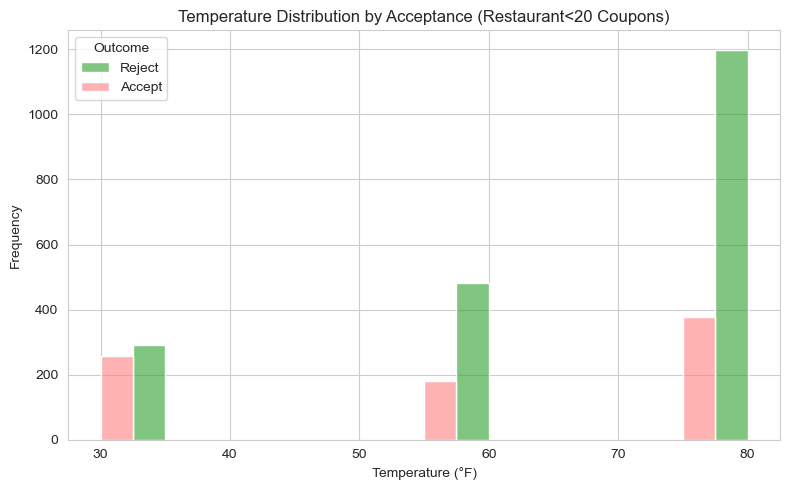

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [129]:
# Histogram for Temperature (continuous)
plt.figure(figsize=(8, 5))  # Compact scaling for unimodal data
sns.histplot(data=rest_df, x='temperature', hue='Y', multiple='dodge', bins=10, palette=['#ff7f7f', '#2ca02c'], alpha=0.6)
plt.title('Temperature Distribution by Acceptance (Restaurant<20 Coupons)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.legend(title='Outcome', labels=['Reject', 'Accept'])
plt.tight_layout()
plt.show()
try:
    plt.savefig('images/coupon/rest20_temperature_by_histogram.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")

4. Horizontal Barplot with Subplots for Occupations (Top 5, Acceptors vs. Rejectors)
2x1 subplots for occupations, using countplot horizontal for long labels.

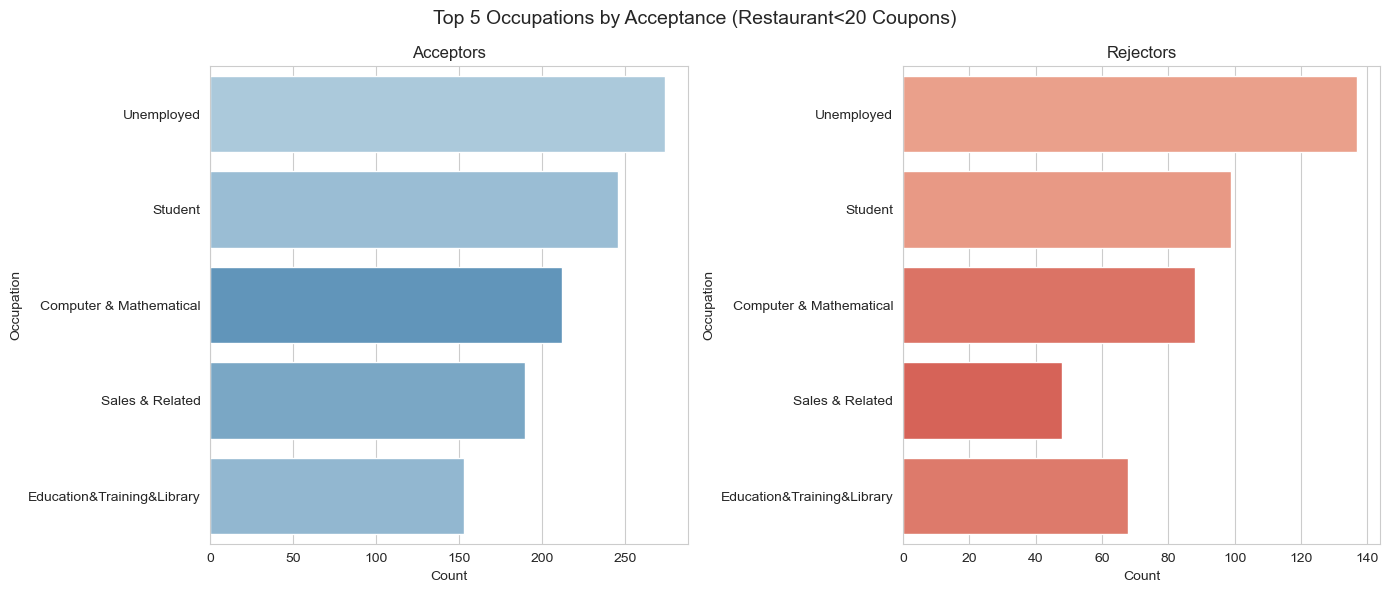

Plot saved successfully!


<Figure size 640x480 with 0 Axes>

In [130]:
# Top 5 Occupations for Acceptors and Rejectors
top_occ = rest_df['occupation'].value_counts().head(5).index

fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # Side-by-side for comparison
fig.suptitle('Top 5 Occupations by Acceptance (Restaurant<20 Coupons)', fontsize=14)

# Acceptors (with hue fix)
sns.countplot(data=rest_df[rest_df['Y'] == 1], y='occupation', hue='occupation',
              order=top_occ, ax=axes[0], palette='Blues_d', legend=False)
axes[0].set_title('Acceptors')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Occupation')

# Rejectors (with hue fix)
sns.countplot(data=rest_df[rest_df['Y'] == 0], y='occupation', hue='occupation',
              order=top_occ, ax=axes[1], palette='Reds_d', legend=False)
axes[1].set_title('Rejectors')
axes[1].set_xlabel('Count')
axes[1].set_ylabel('Occupation')

plt.tight_layout()

# Fixed savefig: Specify filename and options for quality/cropping
#plt.savefig('occupations_by_acceptance.png', dpi=300, bbox_inches='tight')  # Saves as PNG; change extension for PDF/JPG

plt.show()

try:
    plt.savefig('images/coupon/occupations_by_acceptance.png', dpi=300, bbox_inches='tight')
    print("Plot saved successfully!")
except Exception as e:
    print(f"Save error: {e}")